In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

50_startups dataset

In [2]:
df = pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

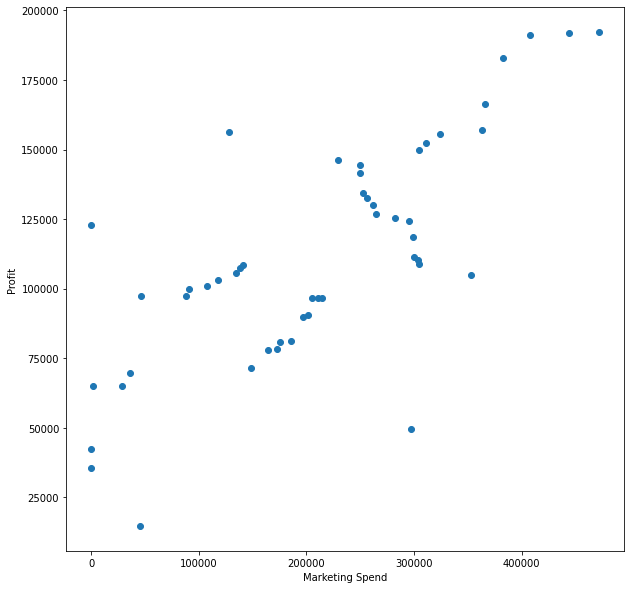

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

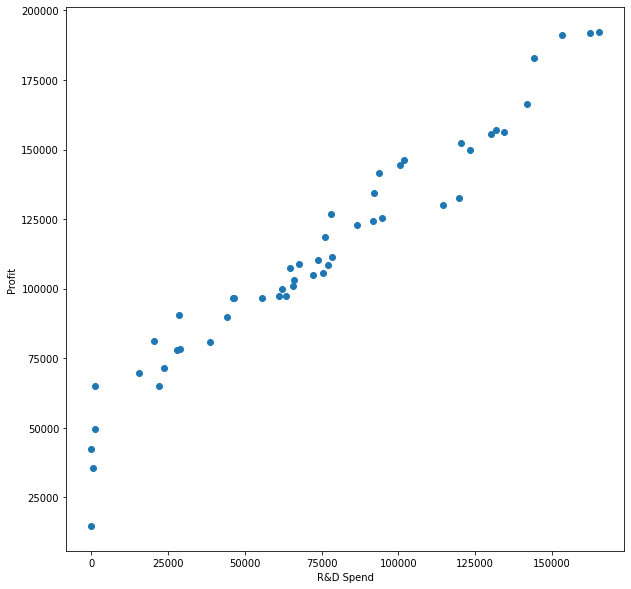

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(df['R&D Spend'],df['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

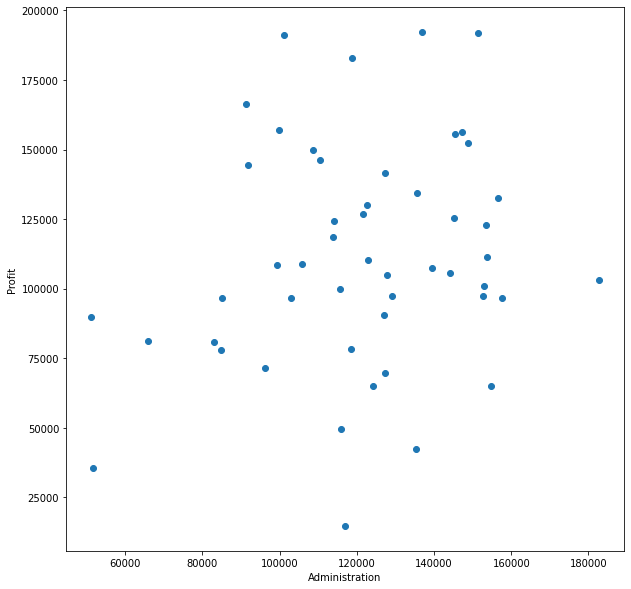

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(df['Administration'],df['Profit'])
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

In [7]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [8]:
df['New York'] = np.where(df['State']=='New York' , 1,0)
df['California'] = np.where(df['State']=='California' , 1,0)
df['Florida'] = np.where(df['State']=='Florida' , 1,0)

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,New York,192261.83,1,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


In [10]:
df1 = df.drop("State" , axis=1)
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [11]:
#Spliting data into dependent and independent variable
x = df1.drop(columns="Profit" , axis=1)
y = df["Profit"]

In [12]:
x.head()

,R&D Spend,Administration,Marketing Spend,New York,California,Florida
0,165349.20,136897.80,471784.10,1,0,0
1,162597.70,151377.59,443898.53,0,1,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,1,0,0
4,142107.34,91391.77,366168.42,0,0,1


In [13]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
min = MinMaxScaler()
df2 = min.fit_transform(x)
df2

array([[1.        , 0.65174393, 1.        , 1.        , 0.        ,
        0.        ],
       [0.98335946, 0.76197173, 0.94089337, 0.        , 1.        ,
        0.        ],
       [0.92798459, 0.37957895, 0.8646636 , 0.        , 0.        ,
        1.        ],
       [0.87313643, 0.51299839, 0.81223513, 1.        , 0.        ,
        0.        ],
       [0.85943772, 0.30532804, 0.77613557, 0.        , 0.        ,
        1.        ],
       [0.797566  , 0.3694479 , 0.76912588, 1.        , 0.        ,
        0.        ],
       [0.81412828, 0.73016111, 0.27071031, 0.        , 1.        ,
        0.        ],
       [0.7880179 , 0.71745725, 0.68649342, 0.        , 0.        ,
        1.        ],
       [0.72901786, 0.74173276, 0.66049977, 1.        , 0.        ,
        0.        ],
       [0.74590551, 0.43692884, 0.64644319, 0.        , 1.        ,
        0.        ],
       [0.61635061, 0.45150637, 0.48573267, 0.        , 0.        ,
        1.        ],
       [0.60884455, 0

In [15]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x , y, test_size=0.2 , random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = reg.predict(x_test)
print(y_pred)

[103015.20159796 132582.27760816 132447.73845174  71976.09851258
 178537.48221055 116161.24230165  67851.69209676  98791.73374687
 113969.43533012 167921.0656955 ]


In [ ]:
print('Accuacy Score:', reg.score(x_test , y_test)*100 , '%')

Accuacy Score: 93.47068473282424 %


In [ ]:
reg.coef_

array([ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02,  7.86007422e+02,
        8.66383692e+01, -8.72645791e+02])

In [ ]:
reg.intercept_

42467.52924855315

In [ ]:
from sklearn.linear_model import Ridge,Lasso
rid = Ridge(alpha=1000)
rid.fit(x_train , y_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
rid.score(x_test , y_test)

0.9393522720800789